# 1- Comparación entre algoritmos de ML clásicos vs cuanticos

In [4]:
!pip install qiskit==0.32.1
!pip install qiskit-aer
!pip install qiskit_machine_learning


  Using cached qiskit-0.32.1.tar.gz (13 kB)
  Preparing metadata (setup.py) ... done
  Using cached qiskit-terra-0.18.3.tar.gz (5.1 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


# Dataset


In [5]:
from sklearn.datasets import fetch_kddcup99
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [6]:
df = load_breast_cancer(as_frame=True)
df = df.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X = df.drop(columns=['target'])
y = df["target"]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y.value_counts()

,count
target,
1,357
0,212


In [9]:
print(X.shape)

(569, 30)


Breast cancer es un dataset clásico. Consta de 569 entradas y 30 features. Al ser un dataset muy conocido, nos parece apropiado para establecer comparativas. Además, tiene un volumen de datos manejable por los algoritmos cuánticos.

### Inspeccion de datos y preprocesamiento


In [10]:
print(X.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [11]:
print(X.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

#### Correlación

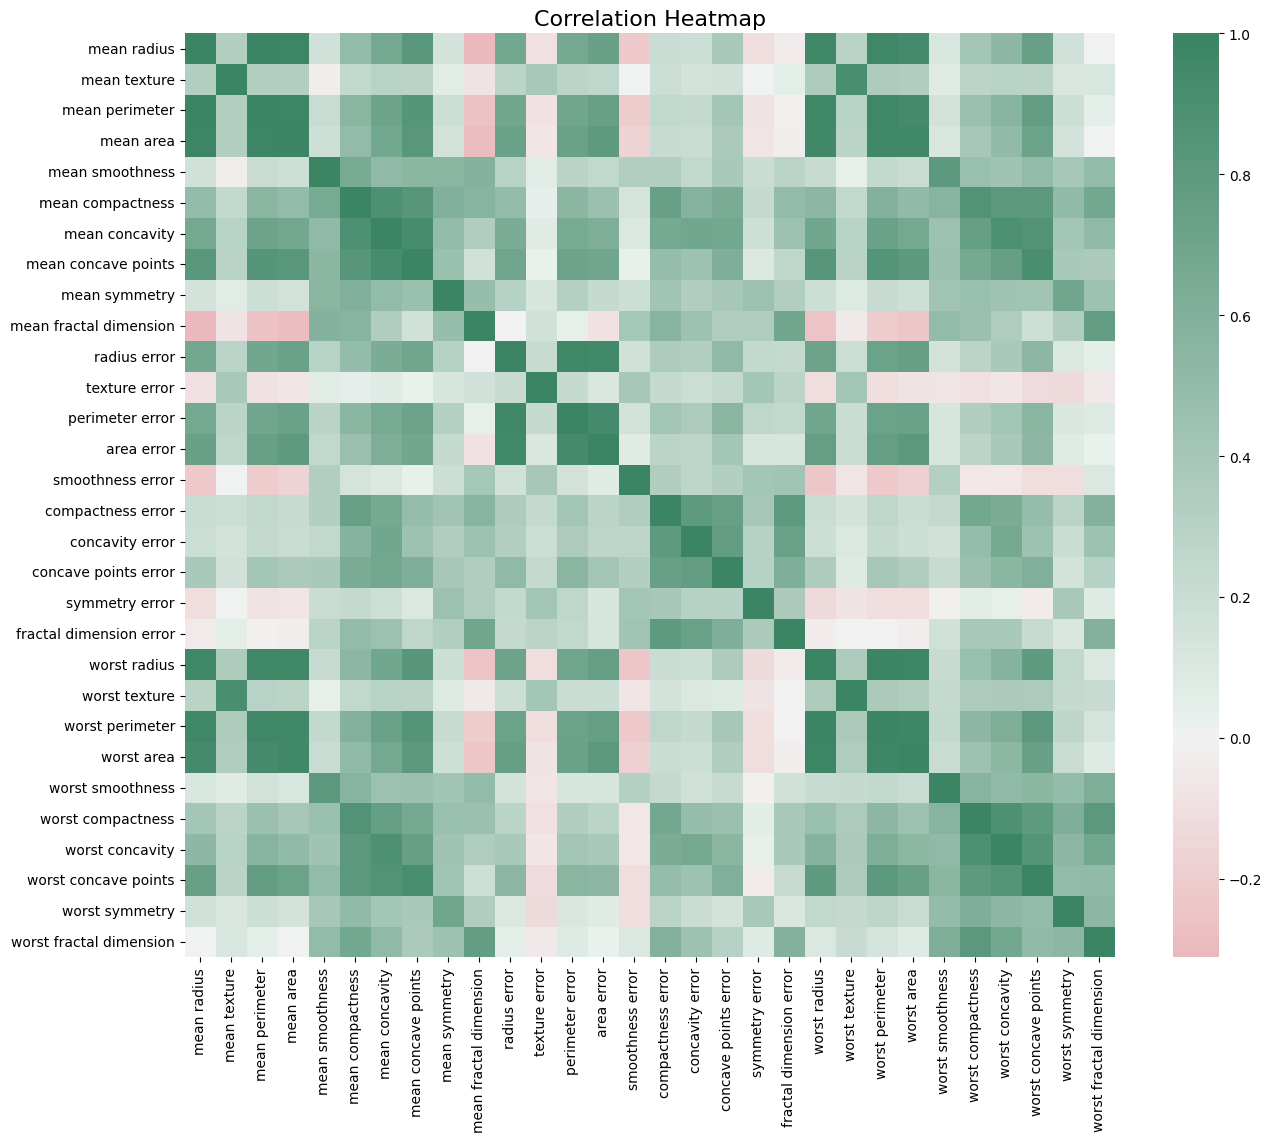

In [12]:
df_numeric = X.select_dtypes(include=[np.number])
# # Keep columns with more than 1 unique value
df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

# Calculate correlation
corr = df_numeric.corr()

# Create the heatmap with custom colors
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap=sns.diverging_palette(10, 150, as_cmap=True), center=0, fmt=".2f")

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Display the plot
plt.show()

Eliminamos features con demasiada correlacion

In [13]:
def remove_high_correlation(X, threshold=0.87):
    # Calcular la matriz de correlaciones
    df_numeric = X.select_dtypes(include=[np.number])
    corr_matrix = df_numeric.corr()

    # Establecer un valor para el máximo de la correlación (sin contar la diagonal)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()

    # Filtrar las correlaciones superiores al umbral especificado
    high_corr = upper[upper > threshold]

    # Si no hay correlaciones altas, terminamos
    if high_corr.empty:
        print("No more pairs with correlation greater than", threshold)
        return X

    # Mostrar la correlación más alta
    max_corr_pair = high_corr.idxmax()
    max_corr_value = high_corr.max()
    print(f"Correlation between {max_corr_pair[0]} and {max_corr_pair[1]} = {max_corr_value}")

    # Eliminar la variable con mayor correlación
    var_to_drop = max_corr_pair[1]
    print(f"Dropping variable {var_to_drop} due to high correlation")
    X = X.drop(columns=[var_to_drop])

    # Llamada recursiva
    return remove_high_correlation(X, threshold)

X = remove_high_correlation(X)

Correlation between mean radius and mean perimeter = 0.9978552814938109
Dropping variable mean perimeter due to high correlation
Correlation between worst radius and worst perimeter = 0.993707916102949
Dropping variable worst perimeter due to high correlation
Correlation between mean radius and mean area = 0.9873571700566127
Dropping variable mean area due to high correlation
Correlation between worst radius and worst area = 0.9840145644590742
Dropping variable worst area due to high correlation
Correlation between radius error and perimeter error = 0.9727936770160764
Dropping variable perimeter error due to high correlation
Correlation between mean radius and worst radius = 0.9695389726112055
Dropping variable worst radius due to high correlation
Correlation between radius error and area error = 0.951830112110991
Dropping variable area error due to high correlation
Correlation between mean concavity and mean concave points = 0.9213910263788588
Dropping variable mean concave points due

# Train-test split

In [14]:
def create_small_subset(X, y, fraction=0.1, random_state=None):
    """
    Crea subconjuntos pequeños de X e y, seleccionando aleatoriamente un porcentaje de las filas.

    Args:
        X (pd.DataFrame): DataFrame de características.
        y (pd.DataFrame o pd.Series): DataFrame o Serie de etiquetas.
        fraction (float): Proporción del tamaño del subconjunto (default: 0.1).
        random_state (int, optional): Semilla para la reproducibilidad (default: None).

    Returns:
        pd.DataFrame, pd.DataFrame o pd.Series: Subconjuntos X_small e y_small.
    """
    # Seleccionar una muestra aleatoria de los índices
    sample_indices = X.sample(frac=fraction, random_state=random_state).index
    # Crear subconjuntos
    X_small = X.loc[sample_indices]
    y_small = y.loc[sample_indices]
    return X_small, y_small

In [15]:
# X_small, y_small = create_small_subset(X, y, fraction=0.75, random_state=42)

# print(X_small.shape)
# print(y_small.shape)

# SVM

In [16]:
# Pasamos las etiquetas a numeros:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Inicializa el LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reduccion de dimensionalidad necesaria para poder ejecutar el dataset
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = np.array(X_train)
X_test = np.array(X_test)


## SVM clasico


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Definir el modelo SVM clásico
svm = SVC(kernel='rbf')

# Entrenar el modelo
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred = svm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
# Exactitud: porcentaje de predicciones correctas sobre el total de predicciones
print(f"Accuracy del modelo SVM: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred, average="macro")
# Precisión: porcentaje de instancias positivas correctamente identificadas (verdaderos positivos / (verdaderos positivos + falsos positivos))
print(f"Precisión del modelo SVM: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred,  average="macro")
# Recall: porcentaje de instancias positivas correctamente identificadas entre todas las instancias positivas reales (verdaderos positivos / (verdaderos positivos + falsos negativos))
print(f"Recall del modelo SVM: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred,  average="macro")
# F1 Score: la media armónica entre precisión y recall, usada cuando hay un desbalance entre clases
print(f"F1 Score del modelo SVM: {f1 * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
# Matriz de confusión: muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos
print(f"Matriz de Confusión:\n{conf_matrix}")

Accuracy del modelo SVM: 91.23%
Precisión del modelo SVM: 92.09%
Recall del modelo SVM: 89.09%
F1 Score del modelo SVM: 90.26%
Matriz de Confusión:
[[ 51  12]
 [  3 105]]


## SVM clásico basado en entrenamiento de kernel cuantico

In [15]:
import numpy as np
import torch
from torch.nn.functional import relu

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

!pip install pennylane

import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers

import matplotlib.pyplot as plt

np.random.seed(42)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00


In [16]:
# scaling the labels to -1, 1 is important for the SVM and the
# definition of a hinge loss
y_train_scaled = [-1 if label == 0 else 1 for label in y_train]
y_test_scaled = [-1 if label == 0 else 1 for label in y_test]
y_train_scaled = np.array(y_train_scaled)
y_test_scaled = np.array(y_test_scaled)

In [17]:
# We use the angle-embedding template which needs as many qubits as there are features:
n_qubits = (X_train.shape[1])
n_qubits

6

In [18]:
dev_kernel = qml.device("lightning.qubit", wires=n_qubits)

projector = np.zeros((2 ** n_qubits, 2 ** n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))
# Sanity check: Evaluar mediante el kernel un punto consigo mismo deberia devovler 1
kernel(X_train[0], X_train[0])


1.0

In [19]:
def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

In [20]:
# Train...
# Aprox 5-10 mins para 4 features
svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)


In [21]:
# Obtenemos registros del entrenamiento:
# Acc:
with dev_kernel.tracker:
    predictions = svm.predict(X_test) # Approx 6 mins para 4 features
    accuracy_score(predictions, y_test)
    print("accuracy:", accuracy_score(predictions, y_test))
# Número de veces que el quantum device ha sido evaluado:
nExec = dev_kernel.tracker.totals['executions']
print(f"Number of executions: {nExec}")

accuracy: 0.6374269005847953
Number of executions: 68058


## Entrenamiento variacional
Vamos a probar con el entrenamiento variacional porque es más eficiente al evitar calcular la matriz de kernels completa, optimizando solo los parámetros del modelo en lugar de evaluar todos los pares de datos, lo que reduce el costo computacional.

In [22]:
dev_var = qml.device("lightning.qubit", wires=n_qubits) # Creamos un dispositivo cuántico simulado en un ordenador clásico con n_qubits qubits.

# Vamos a hacer el codigo necesario para hacer el embedding cuantico, la funcion de perdida, etc
@qml.qnode(dev_var, diff_method="parameter-shift")
def quantum_model(x, params):
    """Circuito cuántico variacional:
    Toma un conjunto de parámetros params (optimizables) y una entrada x (Vector de características).
    """
    # Mapeamos la entrada a un estado cuántico.
    # Aplicamos un embedding de las características de entrada usando AngleEmbedding
    AngleEmbedding(x, wires=range(n_qubits))

    # Generamos el entrelazamiento.
    # Los parametros pueden optimizarse
    StronglyEntanglingLayers(params, wires=range(n_qubits))
    # La salida del circuito es la expectativa del operador PauliZPauliZ en el primer qubit,
    # lo que representa la predicción del modelo cuántico
    return qml.expval(qml.PauliZ(0))

def quantum_model_plus_bias(x, params, bias):
    """Sesgo. Similar a una regresión lineal"""
    return quantum_model(x, params) + bias

def hinge_loss(predictions, targets):
    """ calcula la pérdida de bisagra, que es usada en SVMs.
    Mide la diferencia entre la predicción y la etiqueta objetivo,
    y penaliza las predicciones incorrectas.

    La función relu asegura que la pérdida sea no negativa."""
    all_ones = torch.ones_like(targets)
    hinge_loss = all_ones - predictions * targets
    # trick: since the max(0,x) function is not differentiable,
    # use the mathematically equivalent relu instead
    hinge_loss = relu(hinge_loss)
    return hinge_loss

Proceso de entrenamiento y predicción de un modelo cuántico variacional.

In [23]:
def quantum_model_train(n_layers, steps, batch_size, verbose = True):
    """
    Entrena un modelo cuántico variacional utilizando el optimizador Adam y la pérdida de bisagra.

    Parámetros:
    - n_layers (int): Número de capas en el modelo cuántico.
    - steps (int): Número de pasos de entrenamiento (épocas).
    - batch_size (int): Tamaño del lote para el entrenamiento.

    Devuelve:
    - params_torch (Tensor): Parámetros entrenados del modelo cuántico.
    - bias_torch (Tensor): Sesgo entrenado del modelo cuántico.
    - loss_history (list): Historial de pérdidas durante el entrenamiento.
    """

    # Inicialización de los parámetros del modelo cuántico
    params = np.random.random((n_layers, n_qubits, 3))
    params_torch = torch.tensor(params, requires_grad=True)
    bias_torch = torch.tensor(0.0)

    # Definir el optimizador Adam con una tasa de aprendizaje de 0.1
    opt = torch.optim.Adam([params_torch, bias_torch], lr=0.1)

    # Lista para almacenar el historial de pérdidas
    loss_history = []

    # Bucle de entrenamiento
    for i in range(steps):

        # Seleccionar un lote aleatorio de datos
        batch_ids = np.random.choice(len(X_train), batch_size)
        X_batch = X_train[batch_ids]
        y_batch = y_train[batch_ids]

        # Convertir los datos a tensores de PyTorch
        X_batch_torch = torch.tensor(X_batch, requires_grad=False)
        y_batch_torch = torch.tensor(y_batch, requires_grad=False)

        # Definir la función de cierre para el paso de optimización
        def closure():
            opt.zero_grad()  # Reiniciar los gradientes

            # Calcular las predicciones del modelo para el lote
            preds = torch.stack(
                [quantum_model_plus_bias(x, params_torch, bias_torch) for x in X_batch_torch]
            )

            # Calcular la pérdida de bisagra
            loss = torch.mean(hinge_loss(preds, y_batch_torch))

            # Guardar el valor de la pérdida en el historial
            current_loss = loss.detach().numpy().item()
            loss_history.append(current_loss)

            # Imprimir la pérdida cada 10 pasos
            if i % 10 == 0 and verbose:
                print("Step", i, ", loss:", current_loss)

            # Propagar hacia atrás los gradientes
            loss.backward()
            return loss

        # Realizar un paso de optimización
        opt.step(closure)

    return params_torch, bias_torch, loss_history


def quantum_model_predict(X_pred, trained_params, trained_bias):
    """
    Realiza predicciones utilizando un modelo cuántico entrenado.

    Parámetros:
    - X_pred (array-like): Conjunto de datos de entrada para realizar las predicciones.
    - trained_params (Tensor): Parámetros entrenados del modelo cuántico.
    - trained_bias (Tensor): Sesgo entrenado del modelo cuántico.

    Devuelve:
    - p (list): Lista de predicciones para cada entrada de X_pred. Las predicciones son 1 o -1.
    """

    # Lista para almacenar las predicciones
    p = []

    # Calcular las predicciones para cada muestra de entrada
    for x in X_pred:

        # Convertir la entrada a un tensor
        x_torch = torch.tensor(x)

        # Obtener la predicción del modelo cuántico
        pred_torch = quantum_model_plus_bias(x_torch, trained_params, trained_bias)

        # Convertir la predicción a un valor escalar
        pred = pred_torch.detach().numpy().item()

        # Asignar la predicción a 1 o -1 según el valor
        if pred > 0:
            pred = 1
        else:
            pred = -1

        # Agregar la predicción a la lista
        p.append(pred)
    return p

Step 0 , loss: 0.9985119700431824
Step 10 , loss: 0.7061806917190552
Step 20 , loss: 0.579293966293335
Step 30 , loss: 0.3524186909198761
Step 40 , loss: 0.35717910528182983
accuracy on test set: 0.6140350877192983


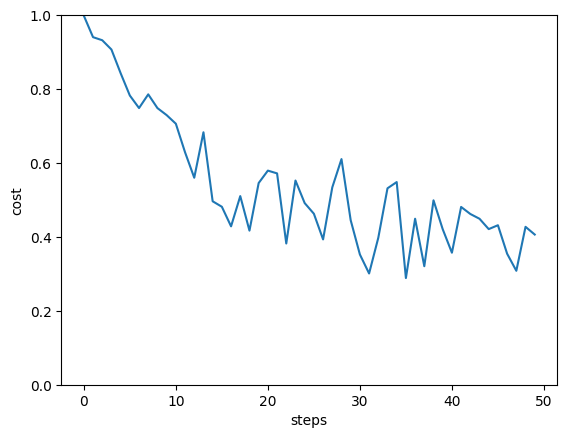

In [24]:
"""
El uso de un entrenamiento variacional y un dispositivo cuántico simulado permite
realizar el ajuste de parámetros en un modelo cuántico sin la necesidad de
calcular explícitamente una matriz de kernel completa (como se haría en métodos clásicos).
Esto optimiza el uso de recursos y hace que el proceso de entrenamiento sea
mucho más manejable, especialmente para problemas de alta dimensión.

Además, al simular el modelo cuántico en un ordenador clásico mediante un
dispositivo como lightning.qubit, se aprovecha la eficiencia del optimizador
Adam y el hecho de que el entrenamiento variacional solo requiere evaluar el
rendimiento del modelo para diferentes configuraciones de parámetros, sin tener
que realizar cálculos exhaustivos sobre todas las interacciones de los datos.
Esto reduce significativamente la carga computacional en comparación con
enfoques clásicos directos.
"""
n_layers = 5
batch_size = 35
steps = 50

with dev_var.tracker:
    trained_params, trained_bias, loss_history = quantum_model_train(n_layers, steps, batch_size)
    pred_test = quantum_model_predict(X_test, trained_params, trained_bias)

print("accuracy on test set:", accuracy_score(pred_test, y_test))

plt.plot(loss_history)
plt.ylim((0, 1))
plt.xlabel("steps")
plt.ylabel("cost")
plt.show()




In [25]:
dev_var.tracker.totals['executions']

179473

## Comparación del número de comparaciones de circuitos necesarios

### Entrenamiento basado en kernel cuantico entrenable

In [26]:
# El número de comprobaciones que tiene que hacer está descrito por la siguiente formula
# M: Ejemplos de entrenamiento -> SVM tiene que crear la gram matrix de tamaño M x M
# Para predecir la calse de Mpred ejemplos de test, SVM tiene que evaluar el kernel como máximo
# Mpred * M veces para obtener la distancia por pares entre los vectores de entrenamiento y
# los vectores de test

# La siguiente funcion expresa lo que acabamos de explicar:
def circuit_evals_kernel(n_data, split):
    """
    Simula el numero de evaluaciones que se le debe hacer al circuito para
    un entrenamiento basado en kernel y su prediccion
    """

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = M * M
    n_prediction = M * Mpred

    return n_training + n_prediction

In [27]:
# Sanity check:
circuit_evals_kernel(n_data=len(X), split=len(X_train) / (len(X_train) + len(X_test)))

226462

###  Entrenamiento variacional

In [28]:
"""
El entrenamiento variacional tiene que calcular la derivada parcial de todos los
parametros entrenables para cada ejemplo de cada batch. Usando parameter-shift rules
(método utilizado para calcular derivadas de circuitos cuánticos con respecto a sus parámetros.
En lugar de calcular directamente los gradientes, se obtiene una aproximación al
cambiar los parámetros y observar el cambio en el resultado), se necesitan aproximadamente
dos evaluaciones de circuito por cada derivada parcial. La prediccion usa tan solo una evaluacion de circuito por ejemplo
"""
def circuit_evals_variational(n_data, n_params, n_steps, shift_terms, split, batch_size):
    """Simula el numero de evaluaciones que se le debe hacer al circuito para
    un entrenamiento variacional y su prediccion."""

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = n_params * n_steps * batch_size * shift_terms
    n_prediction = Mpred

    return n_training + n_prediction

In [29]:
# Sanity check:
circuit_evals_variational(
    n_data=len(X),
    n_params=len(trained_params.flatten()),
    n_steps=steps,
    shift_terms=n_layers,
    split=len(X_train) / (len(X_train) + len(X_test)),
    batch_size=batch_size,
)
# La estimacion es ligeramente superior porque pennylane hace ciertas optimizaciones

787671

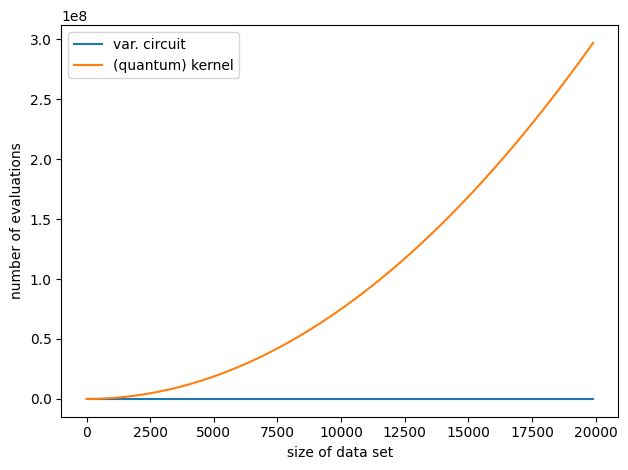

In [30]:
variational_training = []
kernelbased_training = []
x_axis = range(0, 20_000, 100)

for M in x_axis:
    var1 = circuit_evals_variational(
        n_data=M, n_params=len(trained_params.flatten()), n_steps=100, shift_terms=2, split=0.75, batch_size=1
    )
    variational_training.append(var1)

    kernel_eval = circuit_evals_kernel(n_data=M, split=0.75)
    kernelbased_training.append(kernel_eval)

plt.plot(x_axis, variational_training, label="var. circuit")
plt.plot(x_axis, kernelbased_training, label="(quantum) kernel")
plt.xlabel("size of data set")
plt.ylabel("number of evaluations")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import time

# Generate synthetic data
def generate_data(n_samples, X_train, y_train):
    np.random.seed(42)
    X_train_df = pd.DataFrame(X_train)
    y_train_df = pd.DataFrame(y_train)
    X_small, y_small = create_small_subset(pd.DataFrame(X_train), pd.DataFrame(y_train), n_samples)
    y_small[0] = y_small[0].apply(lambda label: -1 if label == 0 else 1)
    X_small = X_small.to_numpy()
    y_small = y_small.to_numpy().flatten()
    return X_small, y_small


def kernel_matrix(A, B, kernel_fn):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel_fn(a, b) for b in B] for a in A])
# Quantum SVM with kernel matrix (QSVC)
def quantum_kernel_svc(X_train, y_train, X_test, y_test, kernel_fn):
    # Calcular las matrices del kernel
    start = time.time()
    K_train = kernel_matrix(X_train, X_train, kernel_fn)
    K_test = kernel_matrix(X_test, X_train, kernel_fn)

    # Ajustar el modelo con matriz precomputada

    svc = SVC(kernel="precomputed").fit(K_train, y_train)

    # Evaluar con matriz precomputada
    y_pred = svc.predict(K_test)
    end = time.time()

    return accuracy_score(y_test, y_pred), end - start

# Variational SVM
def variational_svm(X_train, y_train, X_test, y_test, n_layers=5, batch_size=35, steps=2, verbose = False):
    # Entrenamiento con el modelo cuántico usando quantum_model_train
    start = time.time()
    trained_params, trained_bias, loss_history = quantum_model_train(n_layers, steps, batch_size, verbose)


    # Realizar predicciones en el conjunto de prueba usando quantum_model_predict
    pred_test = quantum_model_predict(X_test, trained_params, trained_bias)
    end = time.time()
    # Calcular la precisión
    accuracy = accuracy_score(pred_test, y_test)

    # Retornar la precisión y el tiempo de entrenamiento como en el caso original de variational_svm
    return accuracy, end - start

import numpy as np
import time

class SimpleSVM:
    def __init__(self, C=0.1, degree=5, max_iter=10000):
        self.C = C
        self.degree = degree
        self.max_iter = max_iter
        self.alpha = None
        self.w = None
        self.b = None
        self.kernel = self.polynomial_kernel

    def polynomial_kernel(self, X1, X2):
        """Calcula el kernel polinómico de grado 5."""
        return (np.dot(X1, X2.T) + 1) ** self.degree

    def fit(self, X, y):
        # Número de ejemplos y características
        n_samples, n_features = X.shape
        # Matriz de gram
        K = self.kernel(X, X)

        # Inicializar alfas
        self.alpha = np.zeros(n_samples)
        self.b = 0

        # Maximizar la función de Lagrange (simplificada para fines demostrativos)
        for _ in range(self.max_iter):
            for i in range(n_samples):
                condition = y[i] * (np.dot(self.alpha * y, K[:, i]) + self.b) < 1
                if condition:
                    # Actualización de los multiplicadores de Lagrange
                    self.alpha[i] += self.C * (1 - y[i] * (np.dot(self.alpha * y, K[:, i]) + self.b))

        # Calculamos w a partir de alpha y el kernel
        self.w = np.dot(self.alpha * y, X)

    def predict(self, X):
        # Predicción para un conjunto de test
        return np.sign(np.dot(X, self.w.T) + self.b)

def classical_svm(X_train, y_train, X_test, y_test):
    start = time.time()

    # Crear el modelo SVM simple
    svm = SimpleSVM(C=3, degree=10, max_iter=100_000)

    # Entrenar el modelo
    svm.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = svm.predict(X_test)

    end = time.time()

    # Devolver la precisión y el tiempo total de ejecución
    accuracy = np.mean(y_pred == y_test)
    return accuracy, end - start

In [32]:

# Benchmarking
n_samples_list = list(range(25,101, 25))
n_samples_list = [s/100 for s in n_samples_list]
accuracies = {"Quantum SVM": [], "Variational SVM": [], "Classical SVM": []}
times = {"Quantum SVM": [], "Variational SVM": [], "Classical SVM": []}
for n_samples in n_samples_list:
    X_train_compare, y_train_compare = generate_data(n_samples, X_train, y_train)
    print(f"\nNumber of samples: {len(X_train_compare)} ({int(n_samples * 100)}%)")

    acc, time_taken = quantum_kernel_svc(X_train_compare, y_train_compare,X_test, y_test, kernel_fn=kernel)
    accuracies["Quantum SVM"].append(acc)
    times["Quantum SVM"].append(time_taken)
    print(f"QSVC: Accuracy = {acc:.2f}, Time = {time_taken:.2f}s")

    acc, time_taken = variational_svm(X_train, y_train, X_test, y_test)
    accuracies["Variational SVM"].append(acc)
    times["Variational SVM"].append(time_taken)
    print(f"Variational SVM: Accuracy = {acc:.2f}, Time = {time_taken:.2f}s")

    acc, time_taken = classical_svm(X_train, y_train, X_test, y_test)
    accuracies["Classical SVM"].append(acc)
    times["Classical SVM"].append(time_taken)
    print(f"Classical SVM: Accuracy = {acc:.2f}, Time = {time_taken:.2f}s")



Number of samples: 100 (25%)
QSVC: Accuracy = 0.45, Time = 63.35s
Variational SVM: Accuracy = 0.58, Time = 30.73s
Classical SVM: Accuracy = 0.49, Time = 316.71s

Number of samples: 199 (50%)
QSVC: Accuracy = 0.63, Time = 170.81s
Variational SVM: Accuracy = 0.58, Time = 32.13s
Classical SVM: Accuracy = 0.49, Time = 329.34s

Number of samples: 298 (75%)
QSVC: Accuracy = 0.63, Time = 326.07s
Variational SVM: Accuracy = 0.58, Time = 32.26s
Classical SVM: Accuracy = 0.49, Time = 325.61s

Number of samples: 398 (100%)
QSVC: Accuracy = 0.63, Time = 528.32s
Variational SVM: Accuracy = 0.58, Time = 31.60s
Classical SVM: Accuracy = 0.49, Time = 332.71s


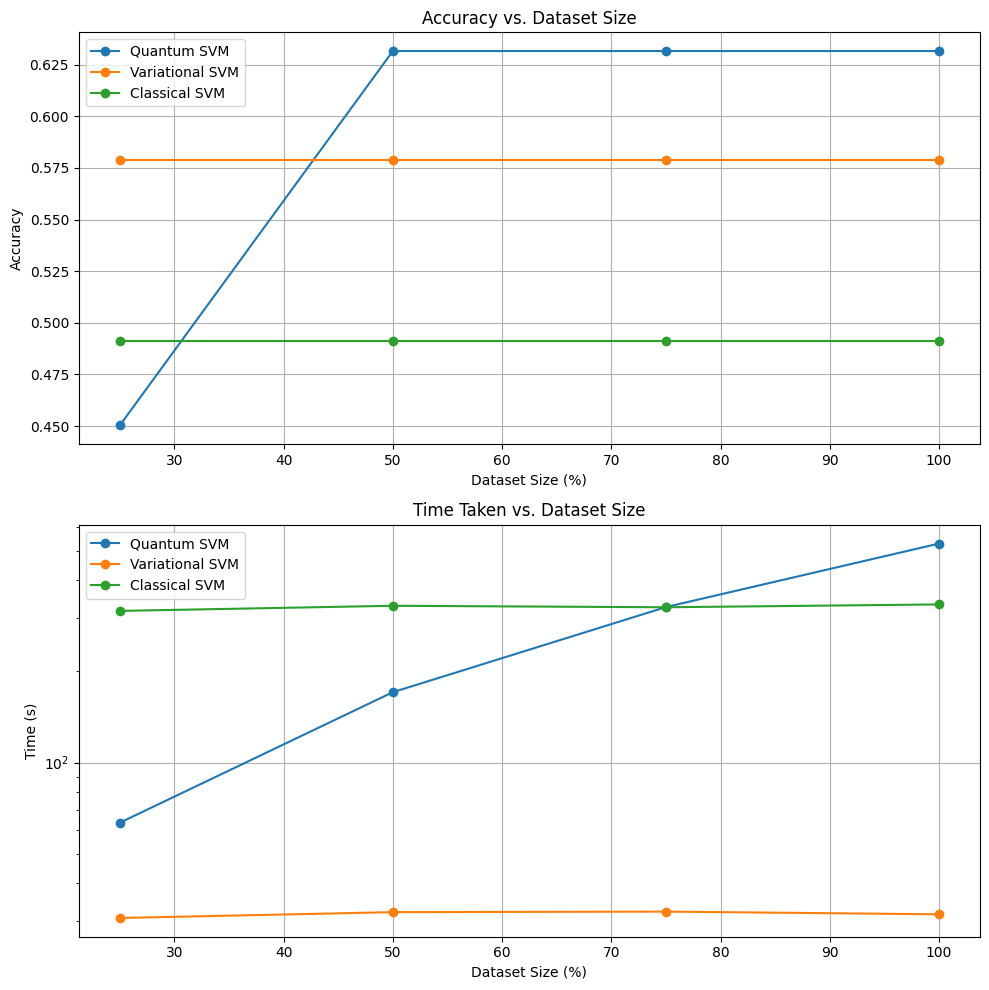

In [33]:
# Convertir tamaños de muestra a porcentajes para la gráfica
n_samples_percent = [s  * 100 for s in n_samples_list]

# Crear la figura
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Precisión
axes[0].plot(n_samples_percent, accuracies["Quantum SVM"], label="Quantum SVM", marker="o")
axes[0].plot(n_samples_percent, accuracies["Variational SVM"], label="Variational SVM", marker="o")
axes[0].plot(n_samples_percent, accuracies["Classical SVM"], label="Classical SVM", marker="o")
axes[0].set_title("Accuracy vs. Dataset Size")
axes[0].set_xlabel("Dataset Size (%)")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(True)

# Tiempo
axes[1].plot(n_samples_percent, times["Quantum SVM"], label="Quantum SVM", marker="o")
axes[1].plot(n_samples_percent, times["Variational SVM"], label="Variational SVM", marker="o")
axes[1].plot(n_samples_percent, times["Classical SVM"], label="Classical SVM", marker="o")
axes[1].set_title("Time Taken vs. Dataset Size")
axes[1].set_xlabel("Dataset Size (%)")
axes[1].set_ylabel("Time (s)")
axes[1].legend()
axes[1].grid(True)

# Cambiar la escala del eje Y a logarítmica
axes[1].set_yscale('log')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [34]:
# Como el volumen de los datos no es suficientemente grande vamos a generar datos sitenticos y comprobar como
# lo gestiona cada modelo
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE



In [35]:
import numpy as np
from sklearn.utils import resample

def generar_datos_extra(X, y, n_total_ejemplos=2000):
    """
    Genera nuevos ejemplos sintéticos hasta alcanzar el número total de ejemplos deseado.

    :param X: DataFrame o numpy array con las características (features)
    :param y: Array o Serie con las etiquetas (target)
    :param n_total_ejemplos: Número total de ejemplos deseados para el conjunto de datos (X_extra, y_extra)

    :return: Nuevas muestras (X_extra) y sus etiquetas correspondientes (y_extra)
    """
    # Calcula el número de ejemplos actuales
    n_ejemplos_originales = X.shape[0]

    # Si el número total de ejemplos deseados es menor que los actuales, lanza un error
    if n_total_ejemplos <= n_ejemplos_originales:
        raise ValueError("El número total de ejemplos debe ser mayor que el número de ejemplos originales.")

    # Número de nuevos ejemplos que necesitamos generar
    n_nuevos_ejemplos = n_total_ejemplos - n_ejemplos_originales

    # Generamos nuevos ejemplos de características aleatoriamente (puedes usar muestreo con reemplazo)
    X_extra = resample(X, n_samples=n_nuevos_ejemplos, replace=True, random_state=42)

    # Generamos nuevas etiquetas aleatorias para los ejemplos generados
    y_extra = np.random.choice(np.unique(y), size=n_nuevos_ejemplos, replace=True)

    # Concatenamos los datos originales con los nuevos ejemplos generados
    X_final = np.vstack([X, X_extra])
    y_final = np.concatenate([y, y_extra])

    return X_final, y_final

# Llamada a la función con el número total de ejemplos deseado
X_train_extra, y_train_extra = generar_datos_extra(X_train, y_train, n_total_ejemplos=5_000_000)



Number of samples: 1250000 (25%)
QSVC: Accuracy = 0.00, Time = 0.00s
Variational SVM: Accuracy = 0.63, Time = 58.21s
Classical SVM: Accuracy = 0.49, Time = 320.40s

Number of samples: 2500000 (50%)
QSVC: Accuracy = 0.00, Time = 0.00s
Variational SVM: Accuracy = 0.63, Time = 35.62s
Classical SVM: Accuracy = 0.49, Time = 312.42s

Number of samples: 3750000 (75%)
QSVC: Accuracy = 0.00, Time = 0.00s
Variational SVM: Accuracy = 0.63, Time = 35.02s
Classical SVM: Accuracy = 0.49, Time = 323.12s

Number of samples: 5000000 (100%)
QSVC: Accuracy = 0.00, Time = 0.00s
Variational SVM: Accuracy = 0.63, Time = 34.95s
Classical SVM: Accuracy = 0.49, Time = 329.10s


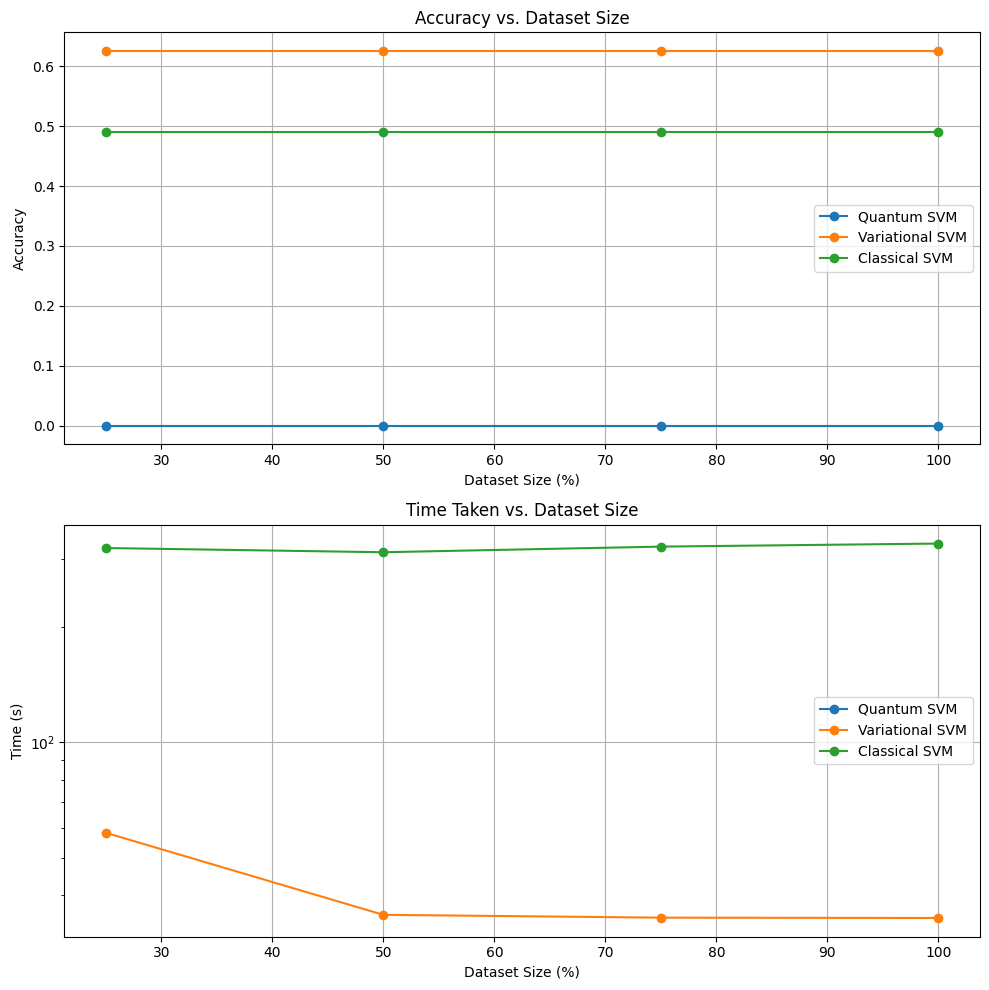

In [36]:
# Benchmarking
n_samples_list = list(range(25,101, 25))
n_samples_list = [s/100 for s in n_samples_list]
accuracies = {"Quantum SVM": [], "Variational SVM": [], "Classical SVM": []}
times = {"Quantum SVM": [], "Variational SVM": [], "Classical SVM": []}
for n_samples in n_samples_list:
    X_train_compare, y_train_compare = generate_data(n_samples, X_train_extra, y_train_extra)
    print(f"\nNumber of samples: {len(X_train_compare)} ({int(n_samples * 100)}%)")

    # acc, time_taken = quantum_kernel_svc(X_train_compare, y_train_compare,X_test, y_test, kernel_fn=kernel)
    acc, time_taken = 0,0
    accuracies["Quantum SVM"].append(acc)
    times["Quantum SVM"].append(time_taken)
    print(f"QSVC: Accuracy = {acc:.2f}, Time = {time_taken:.2f}s")

    acc, time_taken = variational_svm(X_train, y_train, X_test, y_test)
    accuracies["Variational SVM"].append(acc)
    times["Variational SVM"].append(time_taken)
    print(f"Variational SVM: Accuracy = {acc:.2f}, Time = {time_taken:.2f}s")

    acc, time_taken = classical_svm(X_train, y_train, X_test, y_test)
    accuracies["Classical SVM"].append(acc)
    times["Classical SVM"].append(time_taken)
    print(f"Classical SVM: Accuracy = {acc:.2f}, Time = {time_taken:.2f}s")


# Convertir tamaños de muestra a porcentajes para la gráfica
n_samples_percent = [s  * 100 for s in n_samples_list]

# Crear la figura
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Precisión
axes[0].plot(n_samples_percent, accuracies["Quantum SVM"], label="Quantum SVM", marker="o")
axes[0].plot(n_samples_percent, accuracies["Variational SVM"], label="Variational SVM", marker="o")
axes[0].plot(n_samples_percent, accuracies["Classical SVM"], label="Classical SVM", marker="o")
axes[0].set_title("Accuracy vs. Dataset Size")
axes[0].set_xlabel("Dataset Size (%)")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(True)

# Tiempo
axes[1].plot(n_samples_percent, times["Quantum SVM"], label="Quantum SVM", marker="o")
axes[1].plot(n_samples_percent, times["Variational SVM"], label="Variational SVM", marker="o")
axes[1].plot(n_samples_percent, times["Classical SVM"], label="Classical SVM", marker="o")
axes[1].set_title("Time Taken vs. Dataset Size")
axes[1].set_xlabel("Dataset Size (%)")
axes[1].set_ylabel("Time (s)")
axes[1].legend()
axes[1].grid(True)

# Cambiar la escala del eje Y a logarítmica
axes[1].set_yscale('log')

# Mostrar la figura
plt.tight_layout()
plt.show()

### SVM cuantico
Este acercamiento era la manera recomendada de entrenar un support vector machine cuantico hasta la version 0.8.1 de quiskit. Ahora ha quedado desfasado y además resulta muy ineficiente en terminos de tiempo.

In [17]:
import numpy as np
from qiskit_machine_learning.algorithms import QSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from qiskit.circuit.library import ZZFeatureMap

In [20]:
# Definir un Feature Map cuántico (usamos ZZFeatureMap aquí)
# Un Feature Map cuántico es necesario para convertir los datos clásicos (X_train) en un formato que pueda ser procesado por una computadora cuántica.
# Esta transformación permite que los datos puedan ser procesados y manipulados de acuerdo con las reglas cuánticas
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2, entanglement="linear")

# Definir un Quantum Kernel usando el Feature Map cuántico
# Un Quantum Kernel se utiliza para calcular la similitud entre los puntos de datos en el espacio cuántico.
# Esta medida de similitud es esencial en los clasificadores SVM, ya que ayuda a determinar la mejor forma de separar las clases en el modelo.
# Usar un kernel cuántico como FidelityQuantumKernel puede proporcionar una mejor capacidad de separación en ciertos problemas,
# lo que puede resultar en un modelo más preciso comparado con los kernels clásicos.
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Crear un clasificador QSVC (Quantum SVC) con el kernel cuántico
# QSVC (Quantum Support Vector Classifier) es una versión cuántica de los clasificadores SVM tradicionales.
# Usar un kernel cuántico en lugar de un kernel clásico permite que el clasificador trabaje en un espacio cuántico, lo cual puede ser más efectivo
# para ciertos tipos de problemas, aprovechando las propiedades cuánticas como la superposición y el entrelazamiento.
# Este paso crea un clasificador que utiliza el kernel cuántico previamente definido.
qsvm = QSVC(quantum_kernel=quantum_kernel)

# Entrenar el modelo
# Al entrenar el modelo, se ajustan los parámetros del clasificador cuántico para que sea capaz de predecir correctamente las etiquetas de los datos de prueba en el futuro.
qsvm.fit(X_train, y_train)

# Realizar predicciones
# Después de entrenar el modelo, se utilizan los datos de prueba (X_test) para hacer predicciones.
# Este paso permite que el modelo clasifique nuevos ejemplos que no ha visto antes, basándose en lo que ha aprendido durante el entrenamiento.
y_pred = qsvm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo SVM cuántico: {accuracy * 100:.2f}%")


Accuracy del modelo SVM cuántico: 54.39%
